In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import numpy as np

In [2]:
file_location = os.getcwd()

In [3]:
Jan_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJan.csv')
Feb_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainFeb.csv')
Mar_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMar.csv')
Apr_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainApr.csv')
May_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainMay.csv')
Jun_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJun.csv')
Jul_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainJul.csv')
Aug_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainAug.csv')
Sep_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainSep.csv')
Oct_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainOct.csv')
Nov_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainNov.csv')
Dec_path = os.path.join(file_location, 'bicycle_rental_n_return', 'mainDec.csv')

In [4]:
mainJan = pd.read_csv(Jan_path, encoding='cp949')
mainFeb = pd.read_csv(Feb_path, encoding='cp949')
mainMar = pd.read_csv(Mar_path, encoding='cp949')
mainApr = pd.read_csv(Apr_path, encoding='cp949')
mainMay = pd.read_csv(May_path, encoding='cp949')
mainJun = pd.read_csv(Jun_path, encoding='cp949')
mainJul = pd.read_csv(Jul_path, encoding='cp949')
mainAug = pd.read_csv(Aug_path, encoding='cp949')
mainSep = pd.read_csv(Sep_path, encoding='cp949')
mainOct = pd.read_csv(Oct_path, encoding='cp949')
mainNov = pd.read_csv(Nov_path, encoding='cp949')
mainDec = pd.read_csv(Dec_path, encoding='cp949')

In [5]:
month = [mainJan, mainFeb, mainMar, mainApr, mainMay,
        mainJun, mainJul, mainAug, mainSep, mainOct,
        mainNov, mainDec]

for i in month:
    i['가변수'] = i['총_사용인원'].notnull().astype(int)

In [6]:
sum_data = month[0]

for i in month[1:] :
    sum_data['총_사용인원'] += i['총_사용인원']
    sum_data['평균_사용인원'] += i['평균_사용인원']
    sum_data['가변수'] += i['가변수']

In [7]:
sum_data['평균_사용인원'] = sum_data['평균_사용인원']/sum_data['가변수']

In [8]:
total_data = pd.read_csv('data_preprocessing_file.csv', encoding='cp949')
total_data = total_data.merge(sum_data[['대여소_ID', '총_사용인원', '평균_사용인원']], on='대여소_ID', how='left')

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
total_data['동'] = le.fit_transform(total_data['동'])

In [10]:
total_data = total_data.dropna(subset=['총_사용인원'])

In [11]:
total_data.to_csv('result_data_file.csv', index=False, encoding='cp949')

In [12]:
X = total_data[['500m내_대여소가중치','500m내_버스정류소가중치',
                '500m내_지하철역가중치','500m내_교차로가중치',
                '500m내_자전거보관소가중치','500m내_자전거도로가중치',
                '500m내_고등학교가중치','500m내_대학교가중치',
                '500m내_사고건수_가중치','동','500m내_관광지_여부', 
                '500m내_휴게음식점가중치']]
Y = total_data['평균_사용인원'] 

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=300)

선형 회귀 분석

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
linear_pred = linear_model.predict(X_test)

In [17]:
linear_spuared = mean_squared_error(Y_test, linear_pred)
linear_absolute = mean_absolute_error(Y_test, linear_pred)
linear_r2_score = r2_score(Y_test, linear_pred)

랜덤 포레스트

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
randomf_model = RandomForestRegressor(n_estimators=100, random_state=300)
randomf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=300)

In [20]:
randomf_pred = randomf_model.predict(X_test)

In [21]:
randomf_spuared = mean_squared_error(Y_test, randomf_pred)
randomf_absolute = mean_absolute_error(Y_test, randomf_pred)
randomf_r2_score = r2_score(Y_test, randomf_pred)

XGBoost Regressor

In [22]:
!pip install xgboost
from xgboost import XGBRegressor

In [23]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=300)
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=300, ...)

In [24]:
xgb_pred = xgb_model.predict(X_test)

In [25]:
xgb_spuared = mean_squared_error(Y_test, xgb_pred)
xgb_absolute = mean_absolute_error(Y_test, xgb_pred)
xgb_r2_score = r2_score(Y_test, xgb_pred)

Lasso 기반 특성 선택

In [26]:
from sklearn.linear_model import LassoCV

In [27]:
lasso_model = LassoCV(cv=5, random_state=300)
lasso_model.fit(X_train, Y_train)

LassoCV(cv=5, random_state=300)

In [28]:
lasso_pred = lasso_model.predict(X_test)

In [29]:
lasso_spuared = mean_squared_error(Y_test, lasso_pred)
lasso_absolute = mean_absolute_error(Y_test, lasso_pred)
lasso_r2_score = r2_score(Y_test, lasso_pred)

Ridge Regression

In [30]:
from sklearn.linear_model import Ridge

In [31]:
ridge_model = Ridge(alpha=1.0, random_state=300)
ridge_model.fit(X_train, Y_train)

Ridge(random_state=300)

In [32]:
ridge_pred = ridge_model.predict(X_test)

In [33]:
ridge_spuared = mean_squared_error(Y_test, ridge_pred)
ridge_absolute = mean_absolute_error(Y_test, ridge_pred)
ridge_r2_score = r2_score(Y_test, ridge_pred)

ElasticNet

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [35]:
elan_model = make_pipeline(StandardScaler(), ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=300))
elan_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=300))])

In [36]:
elan_pred = elan_model.predict(X_test)

In [37]:
elan_spuared = mean_squared_error(Y_test, elan_pred)
elan_absolute = mean_absolute_error(Y_test, elan_pred)
elan_r2_score = r2_score(Y_test, elan_pred)

KNN Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

In [39]:
KNN_model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))
KNN_model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [40]:
KNN_pred = KNN_model.predict(X_test)

In [41]:
KNN_spuared = mean_squared_error(Y_test, KNN_pred)
KNN_absolute = mean_absolute_error(Y_test, KNN_pred)
KNN_r2_score = r2_score(Y_test, KNN_pred)

In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Mean Squared Error of Various Regression Models')

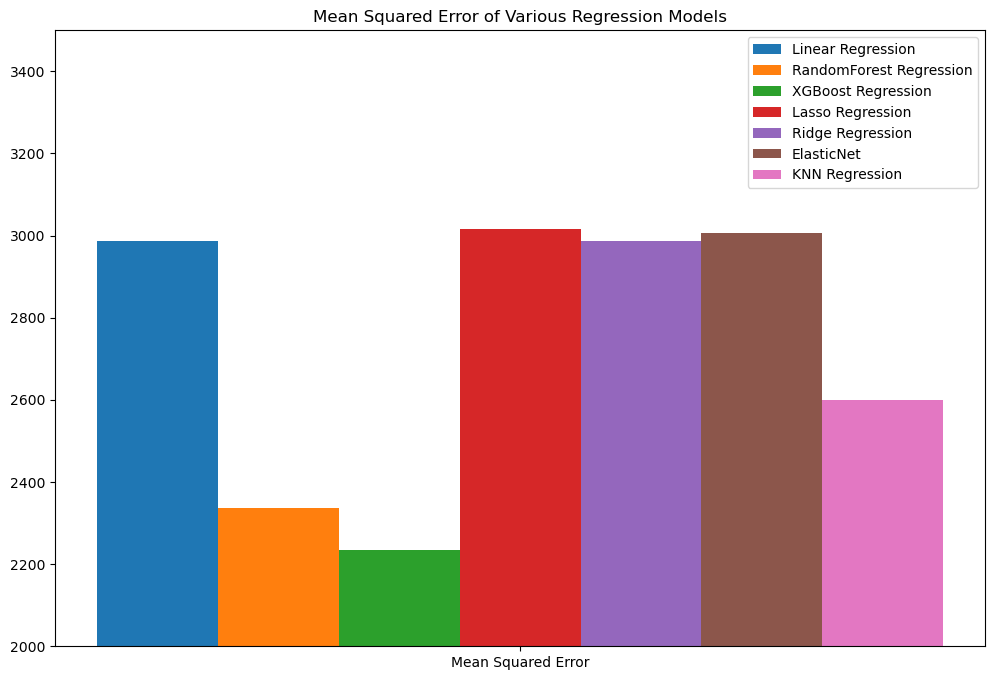

In [43]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Squared Error"]

linear_y = [linear_spuared]
randomf_y = [randomf_spuared]
xgb_y = [xgb_spuared]
lasso_y = [lasso_spuared]
ridge_y = [ridge_spuared]
elan_y = [elan_spuared]
KNN_y = [KNN_spuared]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(2000, 3500)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Squared Error of Various Regression Models')

In [44]:
print(xgb_y)

[2235.6193420540903]


Text(0.5, 1.0, 'Mean Absolute Error of Various Regression Models')

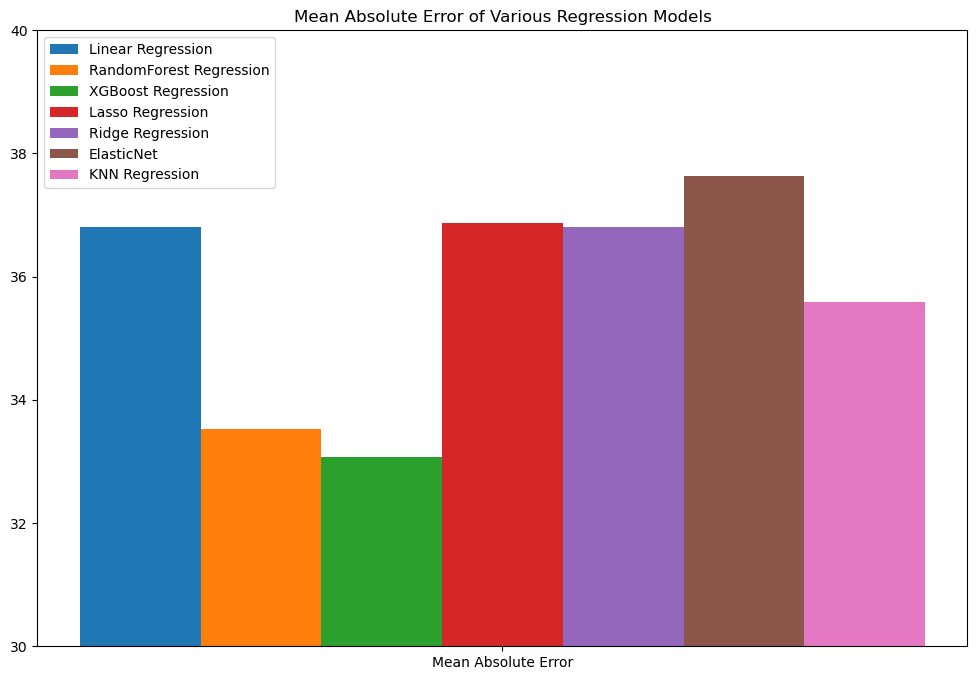

In [45]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["Mean Absolute Error"]

linear_y = [linear_absolute]
randomf_y = [randomf_absolute]
xgb_y = [xgb_absolute]
lasso_y = [lasso_absolute]
ridge_y = [ridge_absolute]
elan_y = [elan_absolute]
KNN_y = [KNN_absolute]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(30, 40)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('Mean Absolute Error of Various Regression Models')

In [46]:
print(xgb_y)

[33.07691659426802]


Text(0.5, 1.0, 'R2 Score of Various Regression Models')

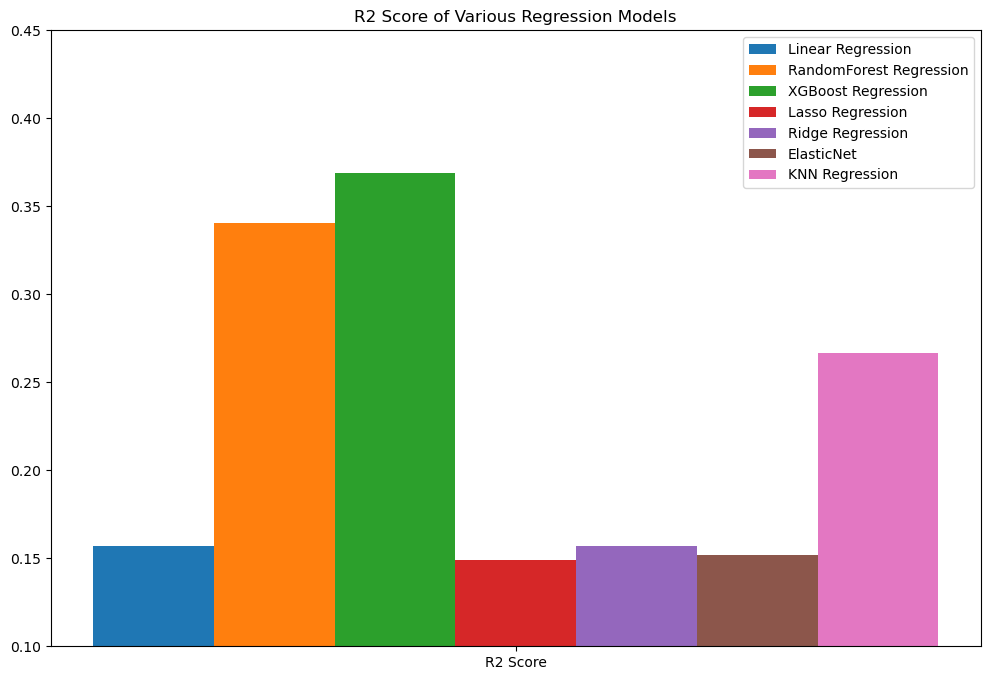

In [47]:
plt.figure(figsize=(12, 8))

evaluation_metric = ["R2 Score"]

linear_y = [linear_r2_score]
randomf_y = [randomf_r2_score]
xgb_y = [xgb_r2_score]
lasso_y = [lasso_r2_score]
ridge_y = [ridge_r2_score]
elan_y = [elan_r2_score]
KNN_y = [KNN_r2_score]

x = np.arange(len(evaluation_metric))

plt.bar(x, linear_y, width=0.2, label='Linear Regression')
plt.bar(x + 0.2, randomf_y, width=0.2, label='RandomForest Regression')
plt.bar(x + 0.4, xgb_y, width=0.2, label='XGBoost Regression')
plt.bar(x + 0.6, lasso_y, width=0.2, label='Lasso Regression')
plt.bar(x + 0.8, ridge_y, width=0.2, label='Ridge Regression')
plt.bar(x + 1.0, elan_y, width=0.2, label='ElasticNet')
plt.bar(x + 1.2, KNN_y, width=0.2, label='KNN Regression')

plt.ylim(0.1, 0.45)

plt.xticks(x + 0.6, evaluation_metric)

plt.legend()

plt.title('R2 Score of Various Regression Models')

In [48]:
print(xgb_y)

[0.36903116121926083]


In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
xgb_g_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=300)

In [57]:
parameter = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 12],
    'learning_rate': [0.1, 0.05, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5]
}

In [58]:
grid_search = GridSearchCV(
    estimator=xgb_g_model,
    param_grid=parameter,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [60]:
tuning_model = make_pipeline(StandardScaler(), grid_search)
tuning_model.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     device=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None,
       

In [61]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators': 500, 'subsample': 0.8}


In [62]:
tuning_pred = tuning_model.predict(X_test)

In [63]:
tuning_spuared = mean_squared_error(Y_test, tuning_pred)
tuning_absolute = mean_absolute_error(Y_test, tuning_pred)
tuning_r2_score = r2_score(Y_test, tuning_pred)

In [64]:
print(tuning_spuared)
print(tuning_absolute)
print(tuning_r2_score)

2181.364015950249
32.33857841356036
0.38434388439419875


In [74]:
xgb_new_model = XGBRegressor(
    colsample_bytree=0.8,
    gamma=1,
    learning_rate=0.01,
    max_depth=12,
    n_estimators=500,
    subsample=0.8,
    objective='reg:squarederror',
    random_state=300
)

In [84]:
xgb_new_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=300, ...)

In [85]:
importances = xgb_new_model.feature_importances_

feature_importance = list(zip(X_train.columns, importances))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

500m내_사고건수_가중치: 0.2196
500m내_휴게음식점가중치: 0.1312
동: 0.1019
500m내_자전거도로가중치: 0.0785
500m내_관광지_여부: 0.0717
500m내_자전거보관소가중치: 0.0699
500m내_지하철역가중치: 0.0676
500m내_교차로가중치: 0.0635
500m내_고등학교가중치: 0.0525
500m내_버스정류소가중치: 0.0497
500m내_대학교가중치: 0.0492
500m내_대여소가중치: 0.0446


In [81]:
X_train_new = X_train.drop(columns=['500m내_대여소가중치'])
X_test_new = X_test.drop(columns=['500m내_대여소가중치'])
xgb_new_model.fit(X_train_new, Y_train)

xgb_new_pred = xgb_new_model.predict(X_test_new)

xgb_new_spuared = mean_squared_error(Y_test, xgb_new_pred)
xgb_new_absolute = mean_absolute_error(Y_test, xgb_new_pred)
xgb_new_r2_score = r2_score(Y_test, xgb_new_pred)

print(xgb_new_spuared)
print(xgb_new_absolute)
print(xgb_new_r2_score)


2202.491005397173
32.61376296323206
0.3783811197376671


In [82]:
X_train_new = X_train.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
X_test_new = X_test.drop(columns=['500m내_대학교가중치','500m내_관광지_여부'])
xgb_new_model.fit(X_train_new, Y_train)

xgb_new_pred = xgb_new_model.predict(X_test_new)

xgb_new_spuared = mean_squared_error(Y_test, xgb_new_pred)
xgb_new_absolute = mean_absolute_error(Y_test, xgb_new_pred)
xgb_new_r2_score = r2_score(Y_test, xgb_new_pred)

print(xgb_new_spuared)
print(xgb_new_absolute)
print(xgb_new_r2_score)

2125.9392150666336
32.08829938404998
0.3999866736630807
